#  Scores for XGBoost + Logistic Regression (Final) model

After calculating the accuracy, sensitivity and specificity for various raw models, we next found the most significant features using XGBoost and trained and tested Logistic Regression model on these features, results of which can be seen in \_\_.  Till here, we hadn’t considered the fact that the **individual instances** were **observations from trials**, and that the observations from the **same trials *may* have some similarity**. Therefore, our next step was to **aggregate** the selected features corresponding to the same TrialID. The aggregation was performed via **mean** and **standard deviation**. 

## Loading the Dataset

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import GridSearchCV #to find the optimal C value for the LogReg model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

df=pd.read_csv('fordTrain.csv')
df1=pd.read_csv('fordTest.csv')

df=df.drop(['P8','V7','V9'],axis=1)
df1=df1.drop(['P8','V7','V9'],axis=1)
#df=df.drop(['TrialID','ObsNum','P8','V7','V9'],axis=1) 
#df1=df1.drop(['TrialID','ObsNum','P8','V7','V9'],axis=1)

Y_train=df.ix[:,'IsAlert'].copy()
X_train=df.drop(['IsAlert'],axis=1)

Y_test=df1.ix[:,'IsAlert'].copy()
X_test=df1.drop(['IsAlert'],axis=1)

/home/arjun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/home/arjun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [4]:
df.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.0,101.96,0.175,752,5.99375,0,2005,13.4,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.0,101.98,0.455,752,5.99375,0,2007,13.4,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.0,101.97,0.280,752,5.99375,0,2011,13.4,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.0,101.99,0.070,752,5.99375,0,2015,13.4,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.0,102.07,0.175,752,5.99375,0,2017,13.4,4,14.7757


____
## Featurewise mean and standard deviation calculation

Note that these calculation were performed only for the **important/significant features** according to the XGBoost model, i.e. *E7*, *E8*, *E9*, *V1* and *V11*. Hence, a total of 10 new feaures (mean and standard deviation for each of the 5 features) were generated.

In [6]:
for i in range(511):
    X_temp=X_train.ix[X_train['TrialID']==i,:].copy()
    mean=np.mean(X_temp['E7'])
    std=np.std(X_temp['E7'])
    X_train.ix[X_train['TrialID']==i,'E7_mean']=mean
    X_train.ix[X_train['TrialID']==i,'E7_std']=std

In [17]:
for i in range(511):
    X_temp=X_train.ix[X_train['TrialID']==i,:].copy()
    mean=np.mean(X_temp['E8'])
    std=np.std(X_temp['E8'])
    X_train.ix[X_train['TrialID']==i,'E8_mean']=mean
    X_train.ix[X_train['TrialID']==i,'E8_std']=std

In [7]:
for i in range(511):
    X_temp=X_train.ix[X_train['TrialID']==i,:].copy()
    mean=np.mean(X_temp['E9'])
    std=np.std(X_temp['E9'])
    X_train.ix[X_train['TrialID']==i,'E9_mean']=mean
    X_train.ix[X_train['TrialID']==i,'E9_std']=std

In [9]:
for i in range(511):
    X_temp=X_train.ix[X_train['TrialID']==i,:].copy()
    mean=np.mean(X_temp['V1'])
    std=np.std(X_temp['V1'])
    X_train.ix[X_train['TrialID']==i,'V1_mean']=mean
    X_train.ix[X_train['TrialID']==i,'V1_std']=std

In [10]:
for i in range(511):
    X_temp=X_train.ix[X_train['TrialID']==i,:].copy()
    mean=np.mean(X_temp['V11'])
    std=np.std(X_temp['V11'])
    X_train.ix[X_train['TrialID']==i,'V11_mean']=mean
    X_train.ix[X_train['TrialID']==i,'V11_std']=std

In [12]:
for i in range(511):
    X_temp=X_test.ix[X_test['TrialID']==i,:].copy()
    mean=np.mean(X_temp['E7'])
    std=np.std(X_temp['E7'])
    X_test.ix[X_test['TrialID']==i,'E7_mean']=mean
    X_test.ix[X_test['TrialID']==i,'E7_std']=std

In [18]:
for i in range(511):
    X_temp=X_test.ix[X_test['TrialID']==i,:].copy()
    mean=np.mean(X_temp['E8'])
    std=np.std(X_temp['E8'])
    X_test.ix[X_test['TrialID']==i,'E8_mean']=mean
    X_test.ix[X_test['TrialID']==i,'E8_std']=std

In [13]:
for i in range(511):
    X_temp=X_test.ix[X_test['TrialID']==i,:].copy()
    mean=np.mean(X_temp['E9'])
    std=np.std(X_temp['E9'])
    X_test.ix[X_test['TrialID']==i,'E9_mean']=mean
    X_test.ix[X_test['TrialID']==i,'E9_std']=std

In [15]:
for i in range(511):
    X_temp=X_test.ix[X_test['TrialID']==i,:].copy()
    mean=np.mean(X_temp['V1'])
    std=np.std(X_temp['V1'])
    X_test.ix[X_test['TrialID']==i,'V1_mean']=mean
    X_test.ix[X_test['TrialID']==i,'V1_std']=std

In [16]:
for i in range(511):
    X_temp=X_test.ix[X_test['TrialID']==i,:].copy()
    mean=np.mean(X_temp['V11'])
    std=np.std(X_temp['V11'])
    X_test.ix[X_test['TrialID']==i,'V11_mean']=mean
    X_test.ix[X_test['TrialID']==i,'V11_std']=std

____
## Logistic Regression Model

The combined set of **15 features** (10 newly generated and the 5 from which they were generated) were again passed to XGBoost for features importance calculation and the features *E9*, *E10*, *V1*, *V11*, *E7_std* and *E7_mean* were selected this time. These features were then used to train the LogReg model.

In [19]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
parameters = { 'C':[1, 10]}
model = GridSearchCV(clf, parameters,cv=10,scoring='roc_auc')

In [20]:
X_train=X_train.ix[:,['E9','E10','V1','V11','E7_std','E7_mean']].copy()
X_test=X_test.ix[:,['E9','E10','V1','V11','E7_std','E7_mean']].copy()

In [21]:
model.fit(X_train,Y_train)
print("train accuracy => ",accuracy_score(model.predict(X_train),Y_train))
print("test accuracy => ",accuracy_score(model.predict(X_test),Y_test))

train accuracy =>  0.771731953952
test accuracy =>  0.881984442238


In [25]:
Y_pred_prob=model.predict_proba(X_test)[:,1]

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred_prob)

0.81178643454673516

In [27]:
def specandsens(a): # Utility function to calculate specificity and sensitivity
    sens=a[1][1]/(a[1][1]+a[1][0])
    spec=a[0][0]/(a[0][0]+a[0][1])
    return spec,sens

In [29]:
confmatrix=confusion_matrix(Y_test, model.predict(X_test))
spec,sens=specandsens(confmatrix)
print(f'specificity is {spec} and sensitivity is {sens}')

specificity is 0.528347930734773 and sensitivity is 0.9983283109341663


____
## ROC curve

In [30]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [31]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred_prob)
roc_auc = auc(fpr, tpr)

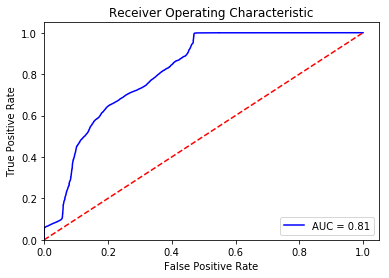

In [32]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#plt.savefig('roc.png')

____
____